## Stat Functions

This notebook contains functions to conduct spectral analysis and filtering on a provided xarray dataset.

In [111]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import random
import xrft
import scipy

## Spectral Function

In [14]:
def spectral_plot(da, points, modes, slope, a_start, k_start):
    a_li=np.zeros((modes,1))
    k_li=np.zeros((modes,1))
    y_li=np.zeros((points,modes))
    y_funct=np.zeros((points,1))

    a_li[0,0]=a_start
    k_li[0,0]=k_start

    for n in range(0,modes-1):
        this_a=a_li[n,0]
        next_a=int(this_a+slope)
        a_li[n+1,0]=next_a

        this_k=k_li[n,0]
        next_k=int(this_k+1)
        k_li[n+1,0]=next_k
        
    x = np.linspace(0, 2*np.pi, num=points)

    for n in range(0,modes):
        y_li[:,n] = np.sin(int(k_li[n])*x)*int(a_li[n])

    y_funct = y_li.sum(axis=1)

    plt.subplot(1,2,1)
    plt.plot(x,y_funct, color='black')
    plt.title("Signal")
    
    da_funct = xr.DataArray(y_funct, dims=['points'], coords={'points':x})
    da_spec = xrft.power_spectrum(da_funct, dim='points')
    plt.subplot(1,2,2)
    da_spec.plot()
    plt.xlim(7,10)
    plt.title("Sepctral Curve")

## Filtering

In [8]:
def filter_plot(da):
    signal = da
    plt.figure(figsize=(20,15))
    plt.subplot(4,1,1)
    plt.plot(x,signal,color='black')
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title('Signal')

    #Gaussian window
    win_gaus = scipy.signal.windows.gaussian(points, std=4)
    filt_gaus = scipy.signal.convolve(signal, win_gaus, mode='same')
    plt.subplot(4,1,2)
    plt.plot(x,filt_gaus)
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title("Window applied: Gaussian (\u03C3=4)")

    #Exponential window
    win_exp = scipy.signal.windows.exponential(points, tau=4)
    filt_exp = scipy.signal.convolve(signal, win_exp, mode='same')
    plt.subplot(4,1,3)
    plt.plot(x,filt_exp)
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title("Window applied: Exponential (\u03C4=4)")
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  

    #Boxcar window
    win_av = scipy.signal.windows.boxcar(points)
    filt_av = scipy.signal.convolve(signal, win_av, mode='same')
    plt.subplot(4,1,4)
    plt.plot(x,filt_av)
    #plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title("Window applied: Boxcar")
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  

In [10]:
def gaussian_plot(da):
    plt.figure(figsize=(20,30))

    signal = y_funct
    plt.subplot(10,1,1)
    plt.plot(x,signal, color='black')
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title('Signal')

    plots=[2,3,4,5]

    for n in range(2,9,2):
        window=scipy.signal.windows.gaussian(points, std=n)
        filt_gaus = scipy.signal.convolve(signal, window, mode='same')
        plt.subplot(10,1,plots[0])
        plt.plot(x,filt_gaus)
        plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
        plt.title("Gaussian window with \u03C3={}".format(n))
        plots.pop(0)

    plt.subplots_adjust(wspace=0.4, hspace=0.5) 

In [11]:
def exponential_plot(da):
    plt.figure(figsize=(20,30))

    signal = y_funct
    plt.subplot(10,1,1)
    plt.plot(x,signal, color='black')
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title('Signal')

    plots=[2,3,4,5,6,7,8,9,10]

    for n in range(5,45,10):
        window=scipy.signal.windows.exponential(points, tau=n)
        filt_gaus = scipy.signal.convolve(signal, window, mode='same')
        plt.subplot(10,1,plots[0])
        plt.plot(x,filt_gaus)
        plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
        plt.title("Exponential window with \u03C4={}".format(n))
        plots.pop(0)

    plt.subplots_adjust(wspace=0.4, hspace=0.5) 

In [12]:
def boxcar_plot(da):
    signal = da
    plt.figure(figsize=(20,15))
    plt.subplot(4,1,1)
    plt.plot(x,signal,color='black')
    plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title('Signal')
    
    win_av = scipy.signal.windows.boxcar(points)
    filt_av = scipy.signal.convolve(signal, win_av, mode='same')
    plt.subplot(2,1,2)
    plt.plot(x,filt_av)
    #plt.ylim(-int(np.max(y_funct)+10), int(np.max(y_funct)+10))
    plt.title("Window applied: Boxcar")
    plt.subplots_adjust(wspace=0.4, hspace=0.4)  

## Actually Useful Functions

In [203]:
def spectral_funct(points, modes, slope, xmax):
    k_ar=np.logspace(0,2,modes)
    a_ar=np.sqrt(0.01*k_ar**(slope/2))
    y_ar=np.zeros((points,modes))
    signal_ar=np.zeros((points,1))
    
    x=np.linspace(0,xmax,num=points)
    
    for n in range(0,modes):
        y_ar[:,n] = np.sin(k_ar[n]*x+np.random.uniform(0,6,size=1))*a_ar[n]
        
    signal_ar=y_ar.sum(axis=1)
    
    signal_da=xr.DataArray(signal_ar, dims=['points'], coords={'points':x})
    signal_spec=xrft.power_spectrum(signal_da,dim='points')
    
    plt.figure(figsize=(15,2))
    plt.subplot(1,2,1)
    plt.plot(x,signal_ar,color='black')
    plt.title("Signal")
    
    plt.subplot(1,2,2)
    signal_spec.plot()
    plt.plot(k_ar/(2*np.pi),(xmax/np.pi)*a_ar**2)
    plt.xscale('log')
    plt.yscale('log')
    plt.title("Power Spectrum")
    plt.xlabel("Wavenumber, log(1/$\lambda$)")
    plt.ylabel("Amplitude, log(a**2)")
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    
    return signal_ar

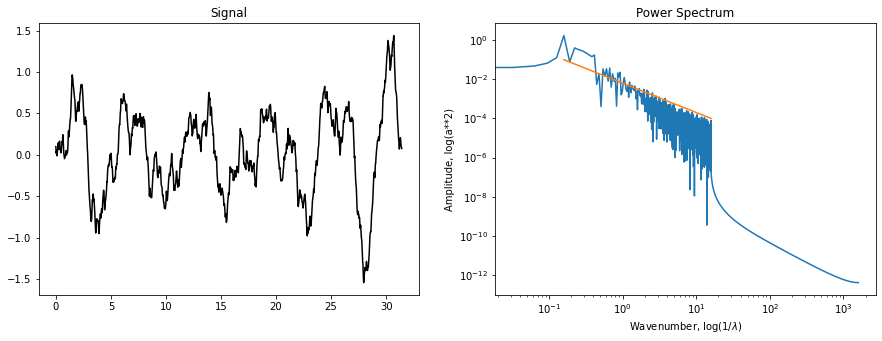

In [207]:
signal_ar=spectral_plot(100000, 200, -3, 10*np.pi)

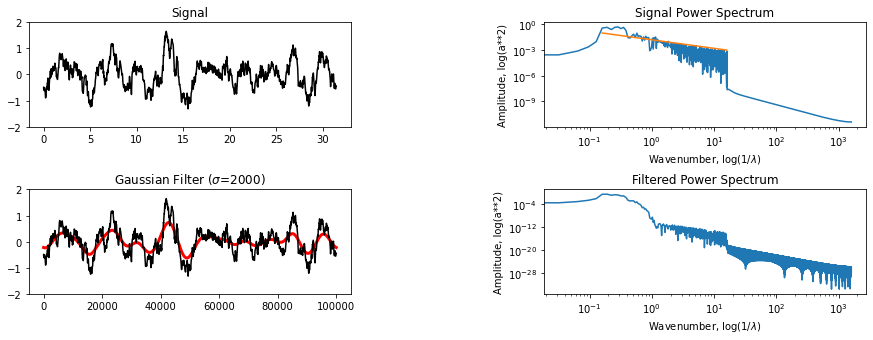

In [355]:
points, modes, slope, xmax, sigma = 100000, 200, -2, 10*np.pi, 2000

k_ar=np.logspace(0,2,modes)
a_ar=np.sqrt(0.01*k_ar**(slope/2))
y_ar=np.zeros((points,modes))
signal=np.zeros((points,1))

x=np.linspace(0,xmax,num=points)

for n in range(0,modes):
    y_ar[:,n] = np.sin(k_ar[n]*x+np.random.uniform(0,6,size=1))*a_ar[n]

signal=y_ar.sum(axis=1)
signal_da=xr.DataArray(signal, dims=['points'], coords={'points':x})
signal_spec=xrft.power_spectrum(signal_da,dim='points')

filtered = scipy.ndimage.gaussian_filter1d(signal, sigma=sigma, mode='wrap')
filtered_da=xr.DataArray(filtered, dims=['points'],coords={'points':x})
filtered_spec=xrft.power_spectrum(filtered_da,dim='points')

#Plot 1: SIGNAL
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.plot(x,signal,color='black')
plt.title("Signal")
plt.ylim(-2,2)

#Plot 2: SIGNAL SPECTRUM
plt.subplot(2,2,2)
signal_spec.plot()
plt.plot(k_ar/(2*np.pi),(xmax/np.pi)*a_ar**2)
plt.xscale('log')
plt.yscale('log')
plt.title("Signal Power Spectrum")
plt.xlabel("Wavenumber, log(1/$\lambda$)")
plt.ylabel("Amplitude, log(a**2)")

#Plot 3: FILTER
plt.subplot(2,2,3)
plt.plot(filtered,color='red',linewidth=3)
plt.plot(signal, color='black')
plt.title("Gaussian Filter ($\sigma$={})".format(sigma))
plt.ylim(-2,2)

#Plot 4: FILTER SPECTRUM
plt.subplot(2,2,4)
filtered_spec.plot()
#plt.plot(k_ar/(2*np.pi),(xmax/np.pi)*a_ar**2)
plt.xscale('log')
plt.yscale('log')
plt.title("Filtered Power Spectrum")
plt.xlabel("Wavenumber, log(1/$\lambda$)")
plt.ylabel("Amplitude, log(a**2)")

plt.subplots_adjust(wspace=0.6,hspace=0.6)

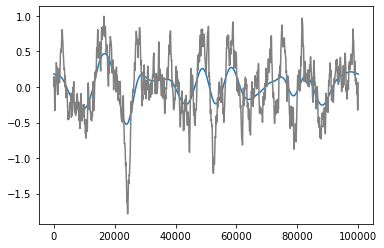

In [290]:
sci_filt = scipy.ndimage.gaussian_filter1d(y_funct, sigma=2000, mode='wrap')
plt.plot(sci_filt)
plt.plot(y_funct, color='grey')
#sigma dependent on grid spacing
#calculate spectra of filtered signal
#see where it falls off
#represent sigma in terms of filter length scale, choose filter length scale, determine del(x), think of gridpoints in terms of x
#give function filter scale, define length scale in terms of distance increment, how does sigma relate to this 
#xrft windowing? calculate spectra with window=True, window_correction? see how this impacts orange line
#just pick Argo float and try this out now, or glider profile since that already has interesting structure
#take filter off of signal itself to create anaomly plot, create variance plots too
#read Wiki sites for variance and standard deviation, this will play into 